# View Created Dataset

Visualize images and masks from the dataset creation pipeline.


In [19]:
import random
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Config - path to your processed dataset
DATA_DIR = Path("../data/processed")
IMAGES_DIR = DATA_DIR / "images"
MASKS_DIR = DATA_DIR / "masks"


In [20]:
def list_images():
    """List all images in the dataset."""
    if not IMAGES_DIR.exists():
        return []      
    return sorted(IMAGES_DIR.glob("*.png"))

def load_sample(img_path: Path):
    """Load image and corresponding mask (if exists)."""
    img = np.array(Image.open(img_path))

    mask_path = MASKS_DIR / f"{img_path.stem}.npy"
    mask = np.load(mask_path) if mask_path.exists() else None

    return img, mask

# Check dataset
all_images = list_images()
images_with_masks = [p for p in all_images if (MASKS_DIR / f"{p.stem}.npy").exists()]
images_without_masks = [p for p in all_images if not (MASKS_DIR / f"{p.stem}.npy").exists()]

print(f"Dataset directory: {DATA_DIR}")
print(f"Total images: {len(all_images)}")
print(f"  With masks (forgeries): {len(images_with_masks)}")
print(f"  Without masks (authentic): {len(images_without_masks)}")


Dataset directory: ../data/processed
Total images: 34340
  With masks (forgeries): 34340
  Without masks (authentic): 0


In [21]:
def show_sample(img_path: Path, threshold: float = 0.5):
    """Display image with mask overlay."""
    img, mask = load_sample(img_path)
    
    if mask is None:
        # No mask - authentic image
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        ax.imshow(img)
        ax.set_title(f"{img_path.name} (authentic)")
        ax.axis("off")
    else:
        # Has mask - forgery
        n_channels = mask.shape[0]
        fig, axes = plt.subplots(1, n_channels + 1, figsize=(4 * (n_channels + 1), 4))

        # Original image
        axes[0].imshow(img)
        axes[0].set_title("Image")
        axes[0].axis("off")

        # Each mask channel
        for c in range(n_channels):
            axes[c + 1].imshow(img)
            axes[c + 1].imshow(mask[c] > threshold, alpha=0.5, cmap="Reds")
            area = mask[c].sum() / mask[c].size * 100
            axes[c + 1].set_title(f"Ch {c} ({area:.1f}%)")
            axes[c + 1].axis("off")

        plt.suptitle(img_path.name)

    plt.tight_layout()
    plt.show()


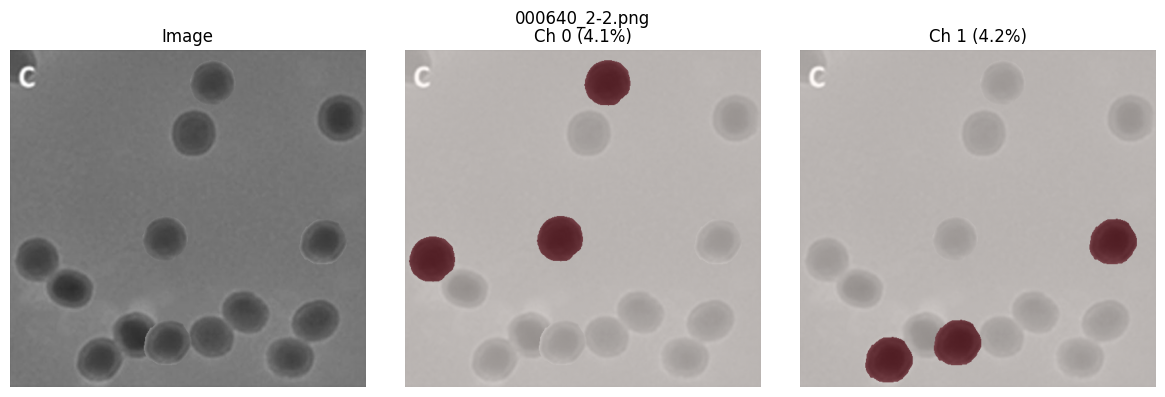

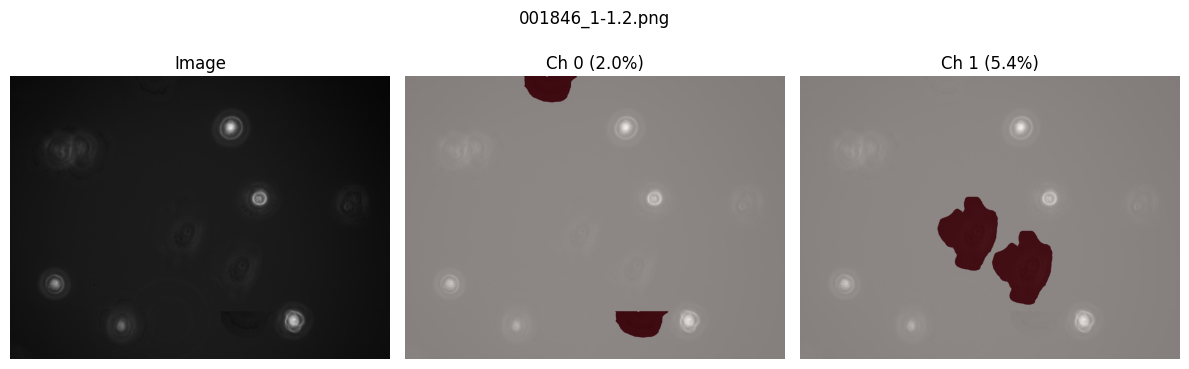

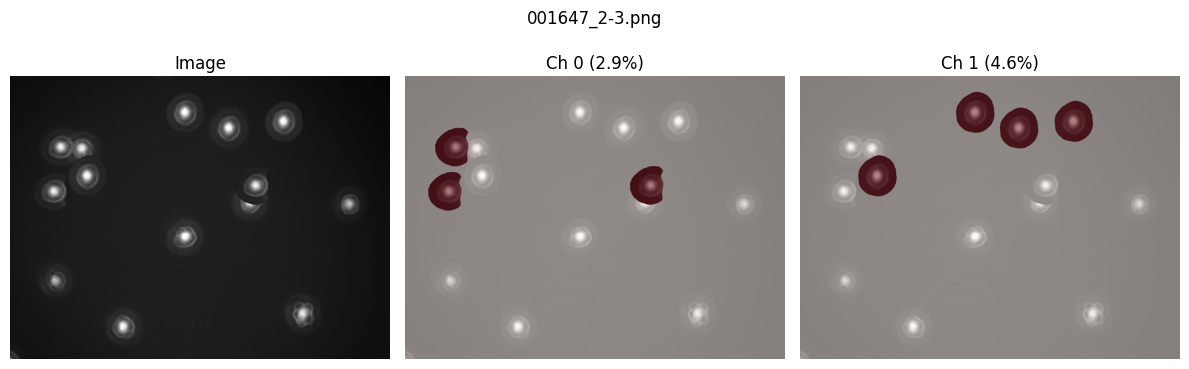

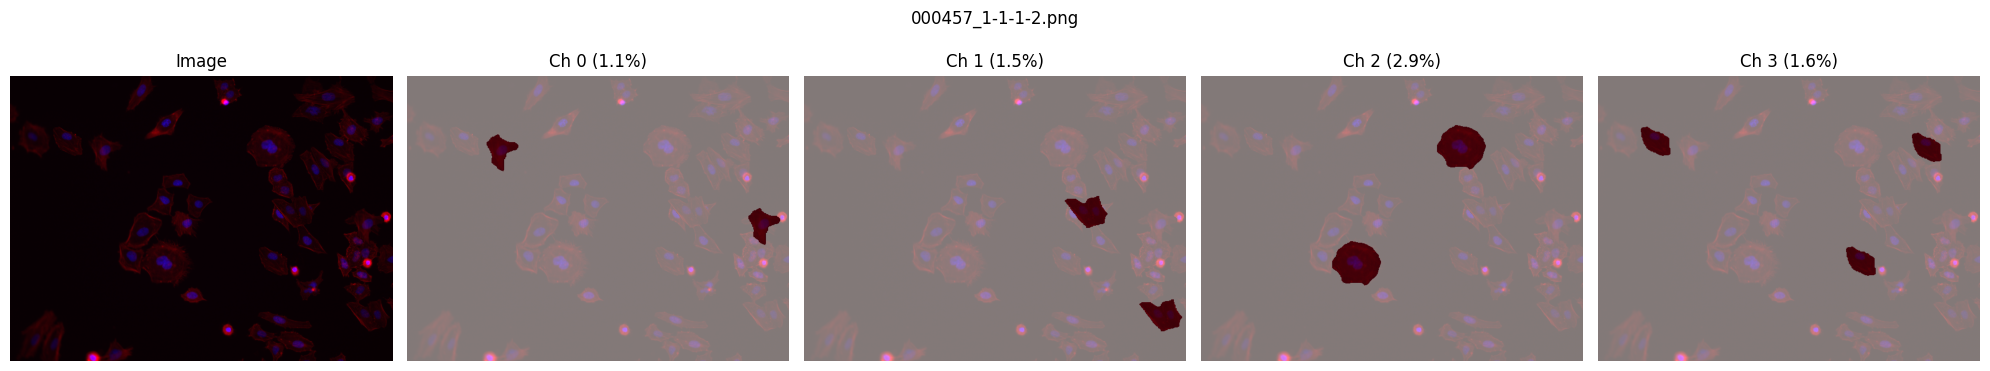

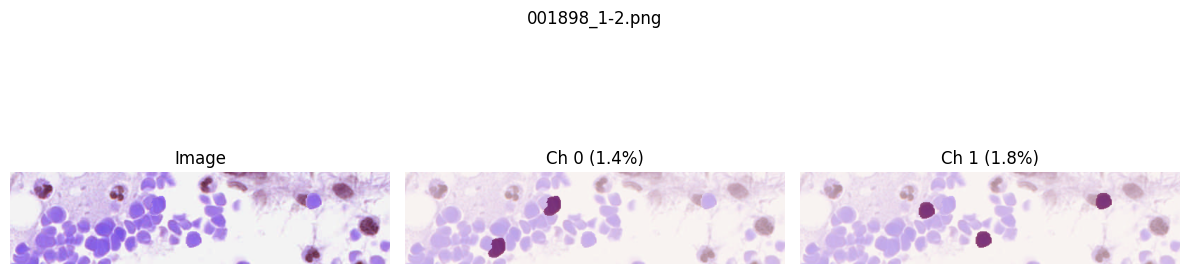

In [22]:
def show_random_samples(n: int = 5, forgeries_only: bool = True):
    """Show n random samples from the dataset."""
    pool = images_with_masks if forgeries_only else all_images
    if not pool:
        print("No images found!")
        return

    samples = random.sample(pool, min(n, len(pool)))
    for path in samples:
        show_sample(path)

# Show 5 random forgery samples
show_random_samples(n=5, forgeries_only=True)


In [23]:
# Show some authentic (no mask) samples
if images_without_masks:
    print("Authentic samples (no forgery):")
    for path in random.sample(images_without_masks, min(3, len(images_without_masks))):
        show_sample(path)
else:
    print("No authentic samples in dataset.")


No authentic samples in dataset.


In [24]:
# View a specific image by name (uncomment and modify)
# show_sample(IMAGES_DIR / "000000_1.1.png")
